In [3]:
import sys
sys.path.append("../")

In [4]:
from CurveDataFetcher import CurveDataFetcher 
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from utils.pca import run_pca_yield_curve, create_residuals_surface_plot, plot_residuals_for_date

import os
from dotenv import dotenv_values
env_path = os.path.join(os.getcwd(), "../.env")
print(env_path)
config = dotenv_values(env_path)

import nest_asyncio
nest_asyncio.apply()

import matplotlib.pylab as pylab
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (20, 10),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
pylab.rcParams.update(params)
sns.set(style="whitegrid", palette="dark")
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

%load_ext autoreload
%autoreload 2

c:\Users\chris\Curvy-CUSIPs\notebooks\../.env


In [5]:
curve_data_fetcher = CurveDataFetcher(use_ust_issue_date=True, fred_api_key=config["FRED_API_KEY"])

In [6]:
cmt_yields_df = curve_data_fetcher.fred_data_fetcher.get_historical_cmt_yields(start_date=datetime(2023, 1, 1), end_date=datetime(2024, 9, 30))
cmt_yields_df = cmt_yields_df.dropna()
cmt_yields_df

# corr_df = ct_yields_df.set_index("Date").corr()
# corr_df.style.background_gradient(
#     sns.diverging_palette(250, 5, as_cmap=True), axis=1
# ).format(precision=6)
# rolling_window = 60
# plt.figure(figsize=(15, 8))
# col1 = "CT30"
# for j, col2 in enumerate(ct_yields_df.columns[3:]):
#     rolling_corr = ct_yields_df[col1].rolling(rolling_window).corr(ct_yields_df[col2])
#     plt.plot(ct_yields_df["Date"], rolling_corr, label=f'{col1} vs {col2}')

# plt.title(f"{rolling_window}d Rolling Corr of {col1}")
# plt.xlabel("Date")
# plt.ylabel('Correlation')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Fetching from FRED...


,Date,CMT3M,CMT6M,CMT1,CMT2,CMT3,CMT5,CMT7,CMT10,CMT20,CMT30
0,2023-01-03,4.40,4.63,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
1,2023-01-04,4.41,4.64,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2,2023-01-05,4.51,4.68,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
3,2023-01-06,4.51,4.65,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
4,2023-01-09,4.55,4.69,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66
...,...,...,...,...,...,...,...,...,...,...,...
433,2024-09-24,4.50,4.23,3.88,3.49,3.44,3.47,3.60,3.74,4.13,4.09
434,2024-09-25,4.51,4.24,3.89,3.53,3.49,3.52,3.65,3.79,4.18,4.14
435,2024-09-26,4.50,4.26,3.96,3.60,3.54,3.55,3.65,3.79,4.17,4.12
436,2024-09-27,4.50,4.24,3.90,3.55,3.49,3.50,3.60,3.75,4.15,4.10


In [7]:
# quote_type = "eod"
# as_of_date = datetime(2024, 9, 26)

# curve_set_df = curve_data_fetcher.build_curve_set(
#     as_of_date=as_of_date,
#     sorted=True,
#     use_github=True,
#     include_off_the_run_number=True,
#     market_cols_to_return=[f"{quote_type}_price", f"{quote_type}_yield"],
# )

# curve_set_df = curve_set_df[~curve_set_df["rank"].isin([0, 1, 2, 3, 4, 5, 6])]
# curve_set_df = curve_set_df[curve_set_df["time_to_maturity"] > 30 / 360]

# curve_set_df = curve_set_df[
#     (curve_set_df["original_security_term"] == "5-Year") 
#     | (curve_set_df["original_security_term"] == "7-Year") 
#     | (curve_set_df["original_security_term"] == "10-Year") 
#     # | (curve_set_df["original_security_term"] == "20-Year")
#     # | (curve_set_df["original_security_term"] == "30-Year")
# ]

# cusips_ts_dict_df = curve_data_fetcher.fedinvest_data_fetcher.cusips_timeseries(
#     cusips=curve_set_df["cusip"]
# )
# cusips_ts_df = pd.DataFrame()
# col = f"{quote_type}_yield"
# for name, df in cusips_ts_dict_df.items():
#     temp_df = df[["Date", col]].rename(columns={col: name})
#     if cusips_ts_df.empty:
#         cusips_ts_df = temp_df
#     else:
#         cusips_ts_df = pd.merge(cusips_ts_df, temp_df, on="Date", how="outer")

# cusips_ts_df = cusips_ts_df.dropna()
# cusips_ts_df

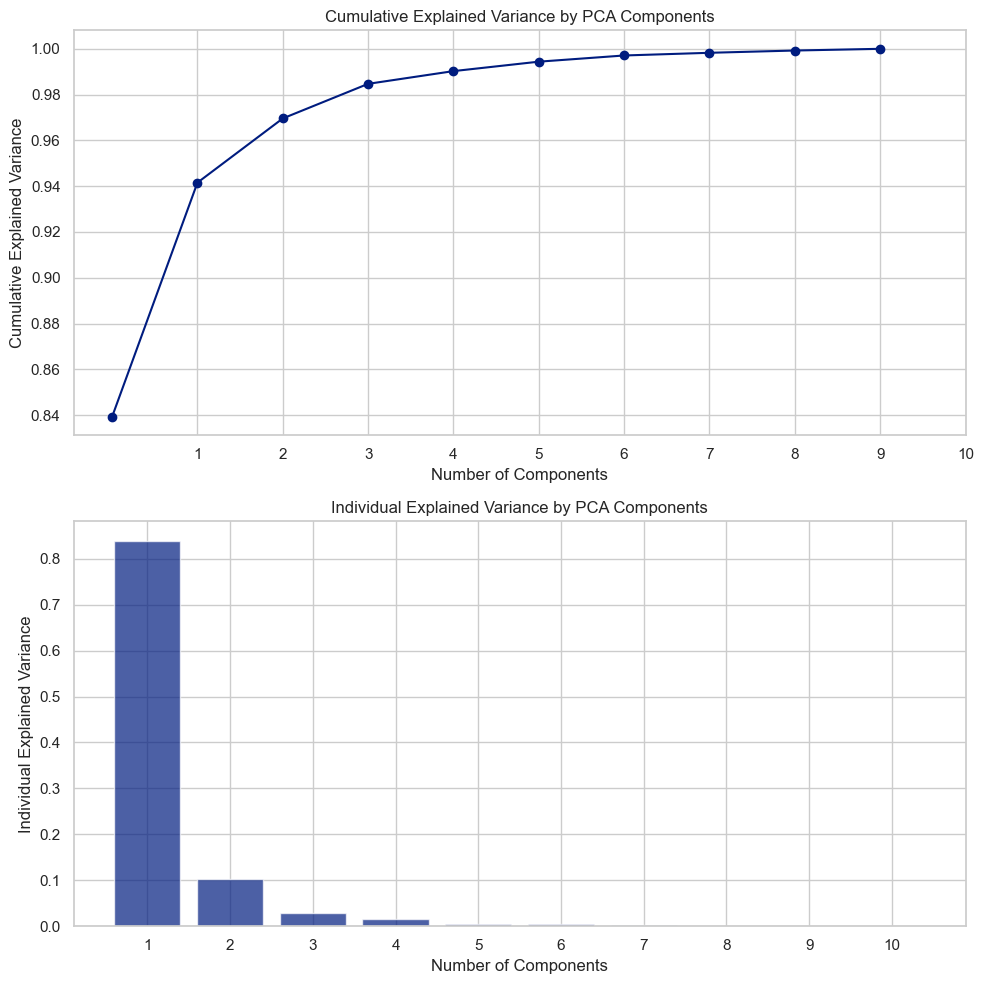

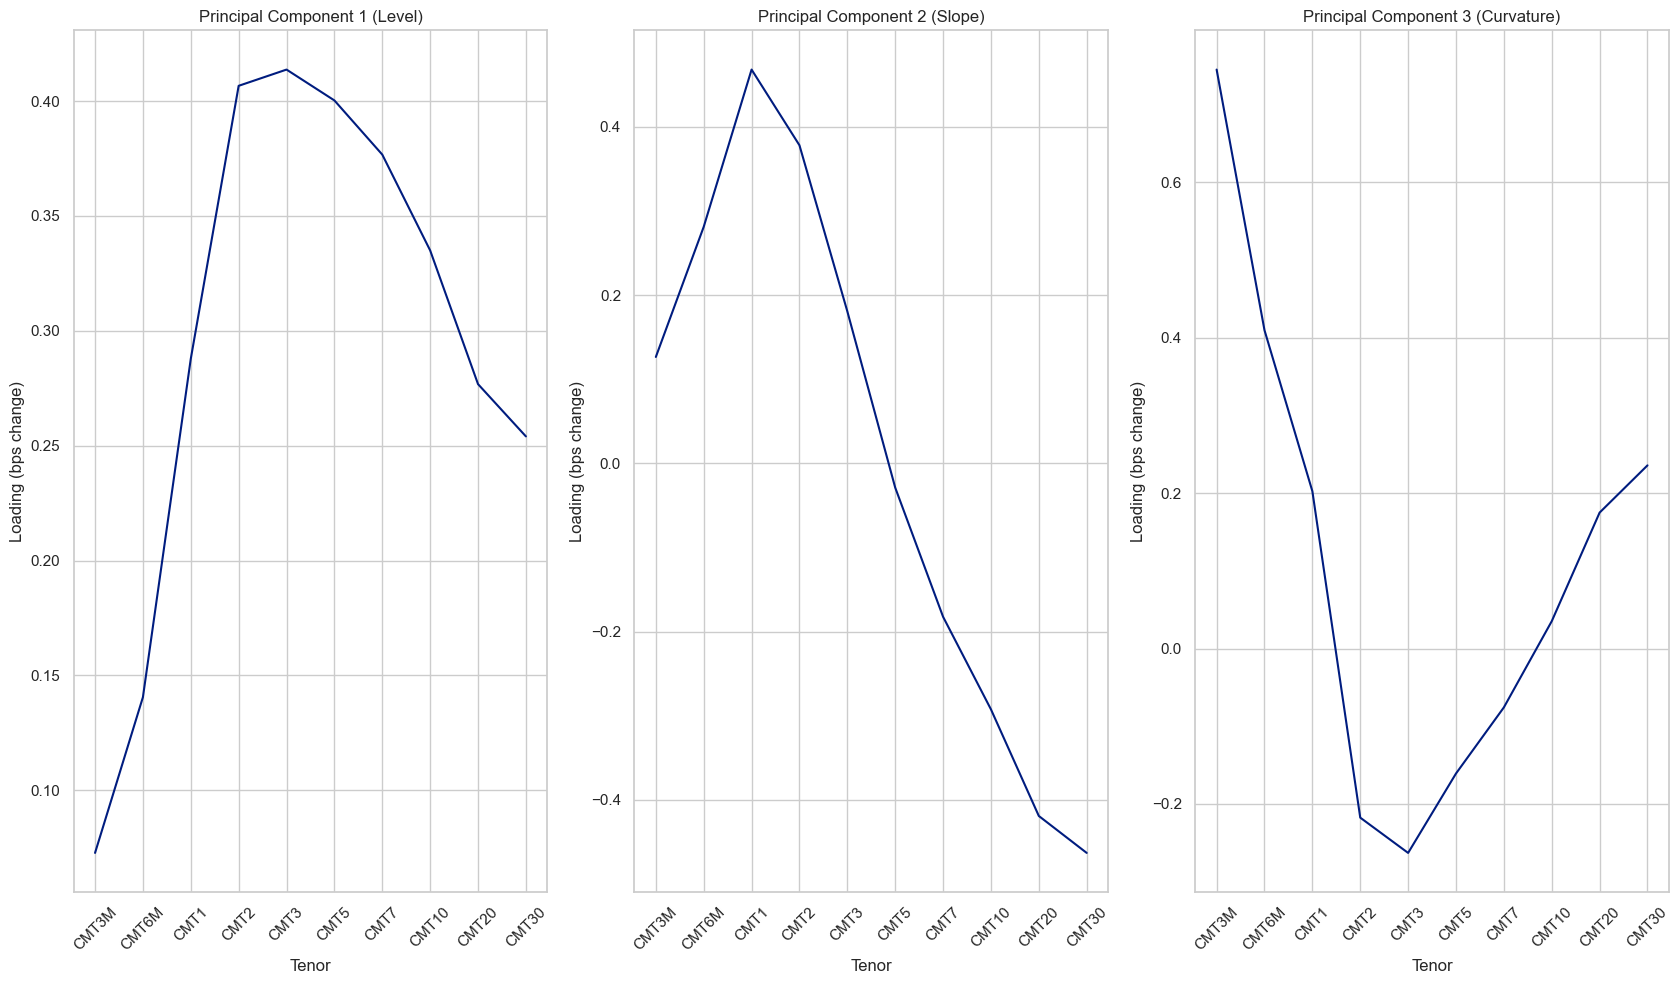


Reconstruction Error (MSE): 0.00013455735664864407


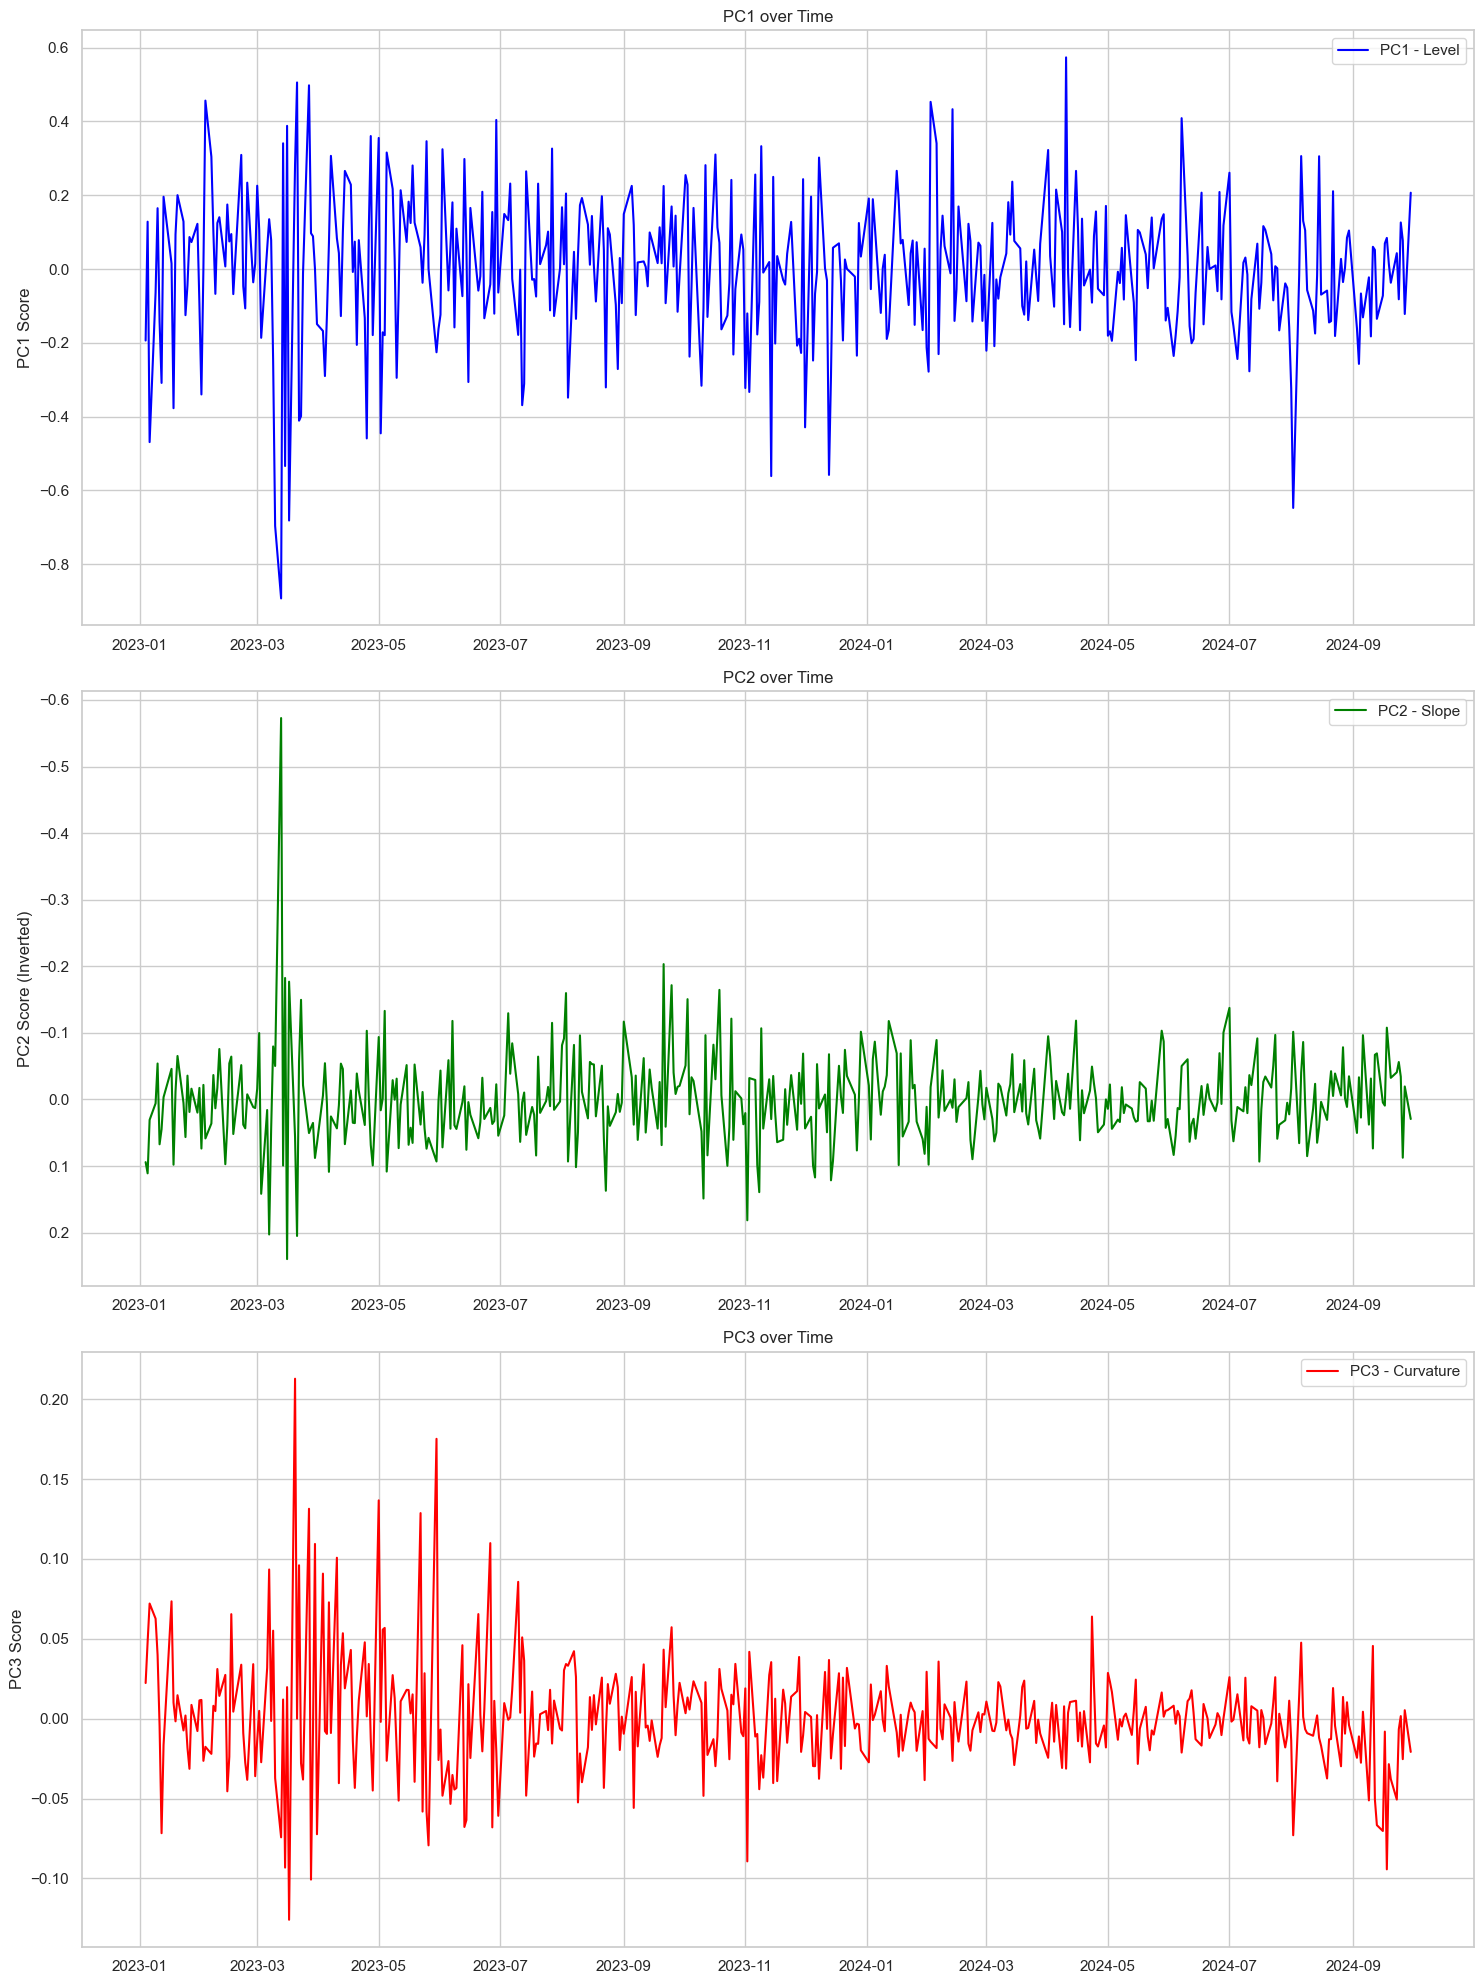

In [8]:
pc3_ct_df = run_pca_yield_curve(
    df=cmt_yields_df.set_index("Date"),
    is_cusips=True,
    n_components=3,
    run_on_diff=True,
    show_cumul_ex_var=True,
    show_eigenvectors=True,
    show_pc_scores_timeseries=True,
    show_reconstructed=True,
    show_3d_plot=True,
    show_recessions=True,
    show_clusters=True,
    num_clusters=25,
)

In [62]:
pc3_ct_df

{'reconstructed_df':                CMT3M     CMT6M      CMT1      CMT2      CMT3      CMT5  \
 Date                                                                     
 2023-01-03  4.452987  4.610677  4.667503  4.417276  4.205101  3.959147   
 2023-01-04  4.466407  4.616541  4.662908  4.365001  4.134482  3.874794   
 2023-01-05  4.522949  4.686627  4.761386  4.442219  4.191388  3.910901   
 2023-01-06  4.550586  4.652527  4.653810  4.247575  3.985524  3.713571   
 2023-01-09  4.596113  4.669545  4.646745  4.209594  3.943704  3.677478   
 ...              ...       ...       ...       ...       ...       ...   
 2024-09-24  4.519117  4.251226  3.827635  3.506066  3.457400  3.480350   
 2024-09-25  4.525813  4.260729  3.844466  3.543309  3.501667  3.530120   
 2024-09-26  4.518269  4.286729  3.907415  3.609300  3.553839  3.560232   
 2024-09-27  4.514243  4.264153  3.860874  3.549251  3.496955  3.511448   
 2024-09-30  4.513522  4.294734  3.930365  3.645870  3.590744  3.593644   
 
   

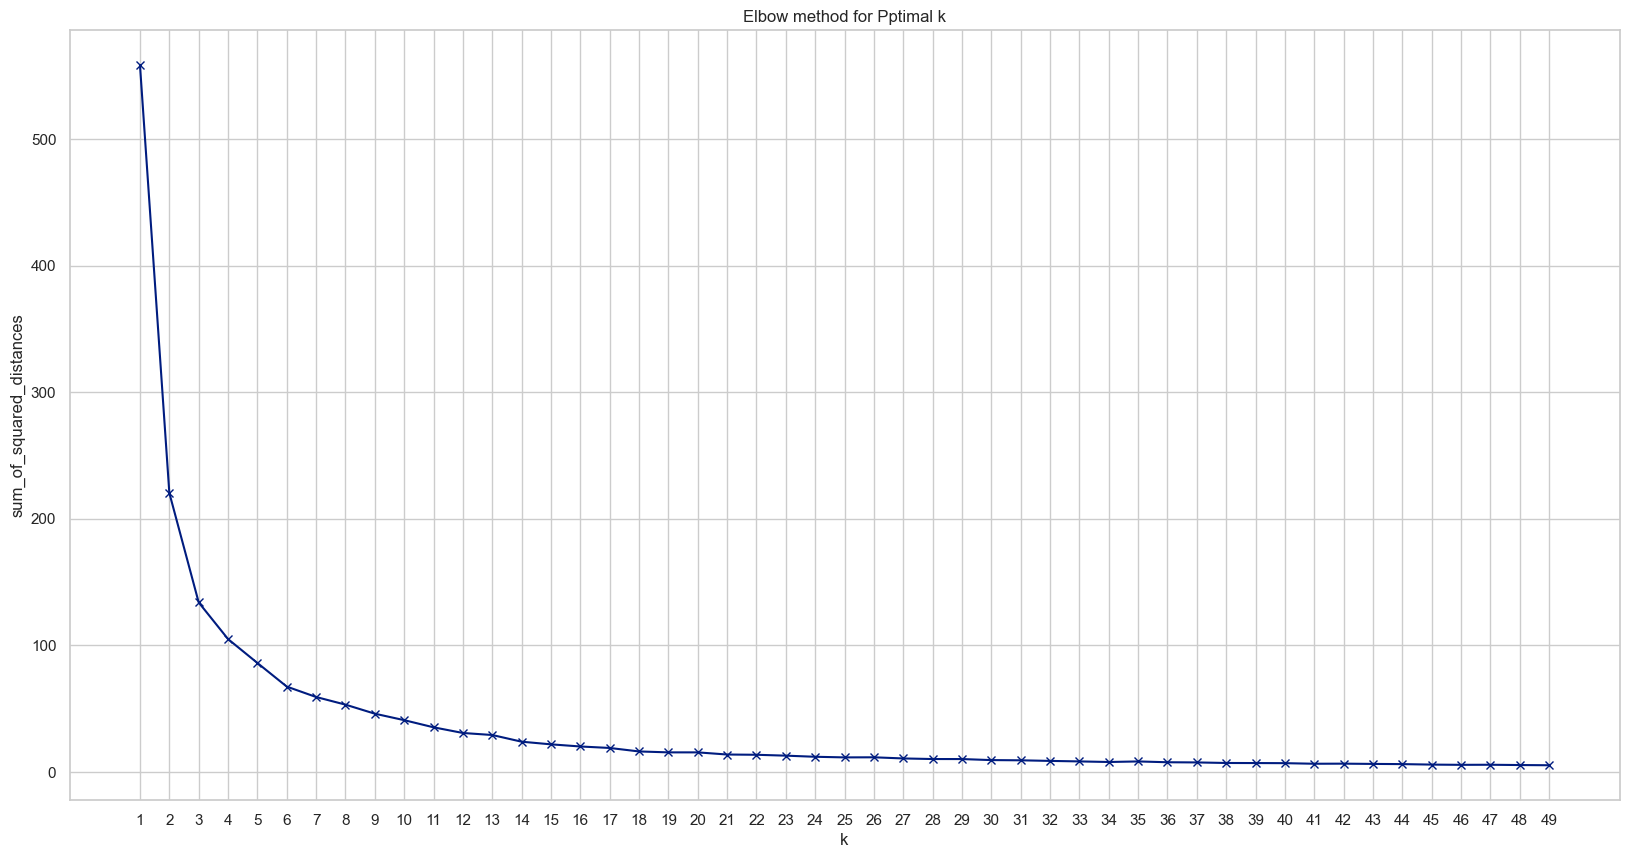

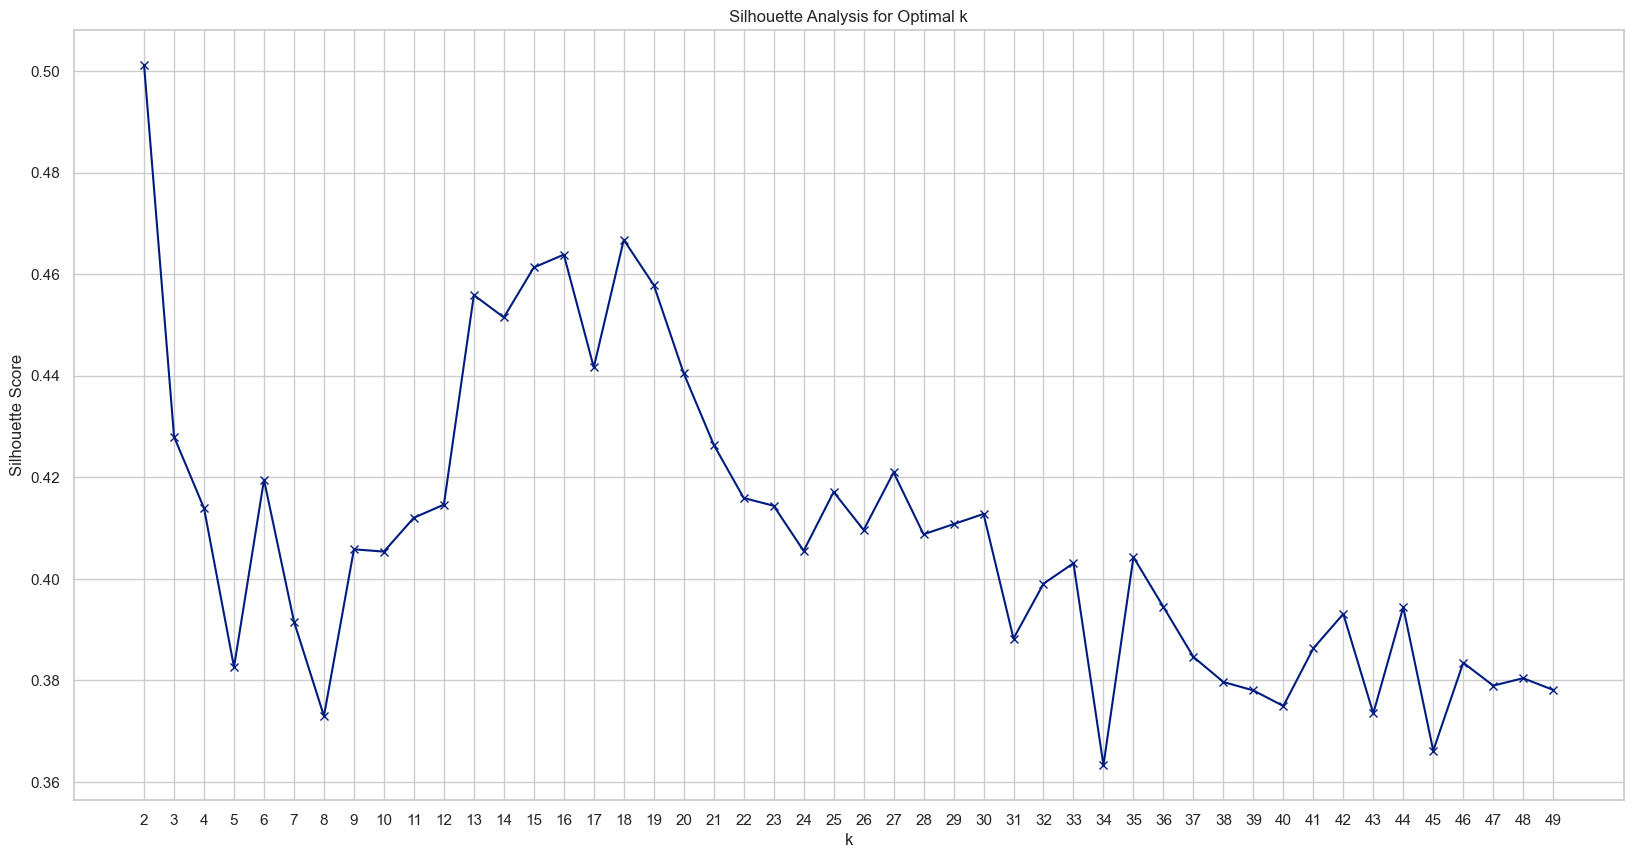

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pc3_ct_df["biplot_df"].set_index("Date")

sum_of_squared_distances = []
K = range(1, 50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xticks(K)
plt.xlabel("k")
plt.ylabel("sum_of_squared_distances")
plt.title("Elbow method for Pptimal k")
plt.show()

silhouette_avg = []
K_silhouette = range(2, 50)  
for num_clusters in K_silhouette:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(data, cluster_labels))

plt.plot(K_silhouette, silhouette_avg, "bx-")
plt.xticks(K_silhouette)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.show()

In [ ]:
residuals_df = pd.DataFrame(
    cusips_ts_df.set_index("Date").values - pc3_ct_df["reconstructed_df"].values,
    columns=pc3_ct_df["reconstructed_df"].columns,
    index=pc3_ct_df["reconstructed_df"].index,
)
residuals_df

In [ ]:
create_residuals_surface_plot(
    residuals_df=pd.DataFrame(
        cusips_ts_df.set_index("Date").values - pc3_ct_df["reconstructed_df"].values,
        columns=pc3_ct_df["reconstructed_df"].columns,
        index=pc3_ct_df["reconstructed_df"].index,
    )
)

In [ ]:
plot_residuals_for_date(
    residuals_df=pd.DataFrame(
        cusips_ts_df.set_index("Date").values - pc3_ct_df["reconstructed_df"].values,
        columns=pc3_ct_df["reconstructed_df"].columns,
        index=pc3_ct_df["reconstructed_df"].index,
    ),
    date=datetime(2024, 9, 4),
)

In [ ]:
# https://github.com/letianzj/QuantResearch/blob/master/notebooks/ch1_pca_relative_value.ipynb
# https://developers.lseg.com/en/article-catalog/article/yield-curve-principal-component-analysis-with-eikon-data-api
# https://github.com/LSEG-API-Samples/Example.EikonAPI.Python.PCAYC
# https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html
# Huggins/Schaller RV Reading

In [ ]:
srf_dict_df = curve_data_fetcher.wsj_data_fetcher.wsj_timeseries_api(
    wsj_ticker_keys=[
        "FUTURE/US/XCME/SR3CU24",
        "FUTURE/US/XCME/SR3CZ24",
        "FUTURE/US/XCME/SR3CH25",
        "FUTURE/US/XCME/SR3CM25",
        "FUTURE/US/XCME/SR3CU25",
        "FUTURE/US/XCME/SR3CZ25",
        "FUTURE/US/XCME/SR3CH26",
        "FUTURE/US/XCME/SR3CM26",
        "FUTURE/US/XCME/SR3CU26",
        "FUTURE/US/XCME/SR3CZ26",
        "FUTURE/US/XCME/SR3CH27",
        "FUTURE/US/XCME/SR3CM27",
        "FUTURE/US/XCME/SR3CU27",
        "FUTURE/US/XCME/SR3CZ27",
        "FUTURE/US/XCME/SR3CH28",
        "FUTURE/US/XCME/SR3CM28",
        "FUTURE/US/XCME/SR3CU28",
        "FUTURE/US/XCME/SR3CZ28",
    ]
)

srf_df = reduce(
    lambda left, right: pd.merge(left, right, on="Date", how="outer"),
    srf_dict_df.values(),
)
srf_df.columns = [col_str.split("/")[-1] for col_str in srf_df.columns]
srf_df = srf_df[srf_df["Date"] > datetime(2024, 1, 1)]

srf_df

In [ ]:
corr_df = srf_df.set_index("Date").corr()
corr_df.style.background_gradient(
    sns.diverging_palette(250, 5, as_cmap=True), axis=1
).format(precision=6)

In [43]:
l = [1, 2]
l[1:]

[2]